Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


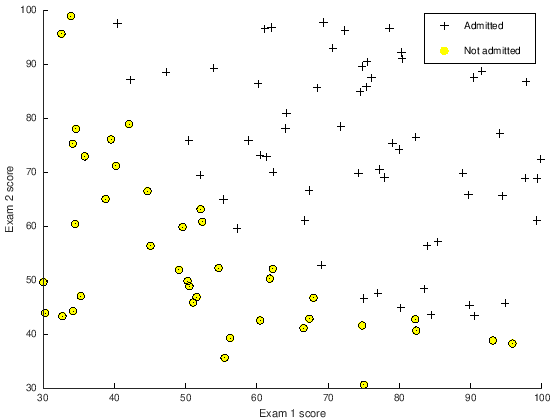

In [2]:
function plotData(X, y)
    % Create New Figure
    figure; hold on;

    % finds indexes of positive datapoints and negative datapoints
    pos = find(y==1);
    neg = find(y==0);

    plot(X(pos, 1), X(pos, 2), 'k+','LineWidth', 2,'MarkerSize', 7);
    plot(X(neg, 1), X(neg, 2), 'ko', 'MarkerFaceColor', 'y','MarkerSize', 7);

    hold off;
end

%% Initialization
clear ; close all; clc

%% Load Data
%  The first two columns contains the exam scores and the third column
%  contains the label.
data = load('ex2data1.txt');
X = data(:, [1, 2]); y = data(:, 3);

fprintf(['Plotting data with + indicating (y = 1) examples and o ' ...
         'indicating (y = 0) examples.\n']);

plotData(X, y);

hold on;
xlabel('Exam 1 score')
ylabel('Exam 2 score')

legend('Admitted', 'Not admitted')
hold off;

In [3]:
function g = sigmoid(z)
    g = zeros(size(z));
    [m,n] = size(z);

    for i=1:m,
        for j=1:n,
            g(i,j) = 1/(1+exp(-z(i,j)));
        end;
    end;
end

sprintf("%.2f  ",sigmoid([0,1,100,-100]))

ans = 0.50  0.73  1.00  0.00  


In [4]:
%% ============ Part 2: Compute Cost and Gradient ============

function [J, grad] = costFunction(theta, X, y)

    % number of training examples
    m = length(y); 

    % You need to return the following variables correctly 
    J = 0;
    grad = zeros(size(theta));

    J = (1/m)*((-y'*log(sigmoid(X*theta)))-((1-y)'*log(1-sigmoid(X*theta))));
    grad = (1/m)*(sigmoid(X*theta)-y)'*X;

end

% reload data to prevent next command from adding additional ones
X = data(:, [1, 2]); y = data(:, 3);
[m, n] = size(X);

% Add intercept term to x and X_test
X = [ones(m, 1) X];

% Initialize fitting parameters
initial_theta = zeros(n + 1, 1);

% Compute and display initial cost and gradient
[cost, grad] = costFunction(initial_theta, X, y);

fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Expected cost (approx): 0.693\n');
fprintf('Gradient at initial theta (zeros): \n');
fprintf(' %f \n', grad);
fprintf('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n');

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros): 
 -0.100000 
 -12.009217 
 -11.262842 
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


In [5]:
% Compute and display cost and gradient with non-zero theta
test_theta = [-24; 0.2; 0.2];
[cost, grad] = costFunction(test_theta, X, y);

fprintf('\nCost at test theta: %f\n', cost);
fprintf('Expected cost (approx): 0.218\n');
fprintf('Gradient at test theta: \n');
fprintf(' %f \n', grad);
fprintf('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n');


Cost at test theta: 0.218330
Expected cost (approx): 0.218
Gradient at test theta: 
 0.042903 
 2.566234 
 2.646797 
Expected gradients (approx):
 0.043
 2.566
 2.647


In [6]:
%% ============= Part 3: Optimizing using fminunc  =============
%  In this exercise, you will use a built-in function (fminunc) to find the
%  optimal parameters theta.

%  Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);

%  Run fminunc to obtain the optimal theta
%  This function will return theta and the cost 
[theta, cost] = ...
	fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);

% Print theta to screen
fprintf('Cost at theta found by fminunc: %f\n', cost);
fprintf('Expected cost (approx): 0.203\n');
fprintf('theta: \n');
fprintf(' %f \n', theta);
fprintf('Expected theta (approx):\n');
fprintf(' -25.161\n 0.206\n 0.201\n');

Cost at theta found by fminunc: 0.203498
Expected cost (approx): 0.203
theta: 
 -25.161272 
 0.206233 
 0.201470 
Expected theta (approx):
 -25.161
 0.206
 0.201


In [7]:
function plotDecisionBoundary(theta, X, y)
%PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
%the decision boundary defined by theta
%   PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
%   positive examples and o for the negative examples. X is assumed to be 
%   a either 
%   1) Mx3 matrix, where the first column is an all-ones column for the 
%      intercept.
%   2) MxN, N>3 matrix, where the first column is all-ones

% Plot Data
plotData(X(:,2:3), y);
hold on

if size(X, 2) <= 3
    % Only need 2 points to define a line, so choose two endpoints
    plot_x = [min(X(:,2))-2,  max(X(:,2))+2];

    % Calculate the decision boundary line
    plot_y = (-1./theta(3)).*(theta(2).*plot_x + theta(1));

    % Plot, and adjust axes for better viewing
    plot(plot_x, plot_y)
    
    % Legend, specific for the exercise
    legend('Admitted', 'Not admitted', 'Decision Boundary')
    axis([30, 100, 30, 100])
else
    % Here is the grid range
    u = linspace(-1, 1.5, 50);
    v = linspace(-1, 1.5, 50);

    z = zeros(length(u), length(v));
    % Evaluate z = theta*x over the grid
    for i = 1:length(u)
        for j = 1:length(v)
            z(i,j) = mapFeature(u(i), v(j))*theta;
        end
    end
    z = z'; % important to transpose z before calling contour

    % Plot z = 0
    % Notice you need to specify the range [0, 0]
    contour(u, v, z, [0, 0], 'LineWidth', 2)
end
hold off

end


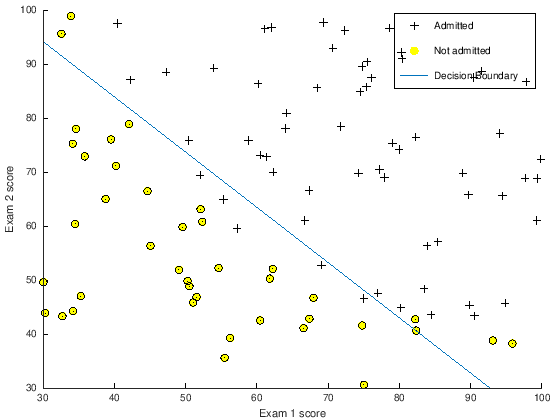

In [8]:
% Plot Boundary
plotDecisionBoundary(theta, X, y);

% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

In [9]:
%% ============== Part 4: Predict and Accuracies ==============

function p = predict(theta, X)
    %PREDICT Predict whether the label is 0 or 1 using learned logistic 
    %regression parameters theta
    %   p = PREDICT(theta, X) computes the predictions for X using a 
    %   threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)

    m = size(X, 1); % Number of training examples
    p = zeros(m, 1);

    p = sigmoid(X*theta);
    for i=1:size(p,1), 
        if p(i)>=0.5,
            p(i)=1;
        else
            p(i)=0;
        end;
    end;

end

prob = sigmoid([1 45 85] * theta);
fprintf(['For a student with scores 45 and 85, we predict an admission ' ...
         'probability of %f\n'], prob);
fprintf('Expected value: 0.775 +/- 0.002\n\n');

% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);
fprintf('Expected accuracy (approx): 89.0\n');
fprintf('\n');

For a student with scores 45 and 85, we predict an admission probability of 0.776289
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.000000
Expected accuracy (approx): 89.0

